This notebook use SVR function 

In [1]:
import sys
import os
%matplotlib inline

In [2]:
# get current working directory
os.getcwd()
# change directory
os.chdir('c:\\Users\\gtheis2\\git\\ACTC_MD_ML')
os.getcwd()

'c:\\Users\\gtheis2\\git\\ACTC_MD_ML'

In [3]:
from rdkit.Chem.Draw import rdMolDraw2D
from src.trainers import Trainers
from src.polymerSMILES import polymers
from src.dataProcessing import * #DataPreprocessing #computeTanimotoSimilarity #* #data_load, computeTanimotoSimilarity, get_dissimilarity_map, featurizer, normalizedata
from src.solver import *

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# load smiles
polymers_dict = polymers.get_data() # get rdkit formats of the polymer smiles 

In [5]:
# instantiate data preprocessing toolbox
preprocess = DataPreprocessing()

In [7]:
data = preprocess.data_load(filename ='1-0-hgk-MD-ActCoeff-processed_Activity.csv')

In [8]:
data.head()

,#,Name of the polymer,CounterIon,Co-Ion,salt,Water-per-ion,concentration of salt (M),gr_minima (Ion_H2O),gr_peak_position (Ion_H2O),gr_peak_height (Ion_H2O),Nr_(Ion_H2O),gr_minima (CG_H2O),gr_peak_position (CG_H2O),gr_peak_hight (CG_H2O),Nr_(CG_H2O),gr_minima (CG_Ion),gr_peak_position (CG_Ion),gr_peak_height (CG_Ion),Nr_(CG_Ion),Experimental activity co.
0,1,PSbNMP_RCE,I-,K+,KI,6,0.02,4.45,3.65,6.50,4.70,5.50,3.55,2.30,6.10,6.15,4.15,5.80,1.90,0.300000
1,2,PSbNMP_RCE,I-,K+,KI,6,0.20,4.45,3.65,6.30,4.60,5.50,3.55,1.90,5.00,6.15,4.15,5.80,2.00,0.319000
2,3,PSbNMP_RCE,I-,K+,KI,6,0.50,4.45,3.65,6.20,4.60,5.50,3.55,1.80,4.50,6.15,4.15,5.60,2.20,0.476000
3,4,PSbNMP_RCE,I-,K+,KI,6,1.00,4.55,3.65,6.00,4.70,5.00,3.55,1.50,3.00,6.15,4.15,5.10,2.50,0.663000
4,5,PVAS_RCE,Na+,Cl-,NaCl,113,0.02,3.15,2.35,8.55,5.38,3.37,2.76,1.83,2.98,3.06,2.35,6.71,0.13,0.280899


In [9]:
## assign X, y
(X, y, MFprints) = preprocess.featurizer(data, polymers_dict,  'activity') # descr = 'solvation' or 'activity'

In [10]:
(data_activity_scaler, X_train, X_test, y_train, y_test) = preprocess.normalizedata(X, y, splitRatio=0.2, state = 48, transform = True, property = None)
print(f"X_train, X_test, y_train, & y_test has shapes of {X_train.shape}, {X_test.shape}, {y_train.shape}, & {y_test.shape} respectively.")

X_train, X_test, y_train, & y_test has shapes of (64, 153), (16, 153), (64,), & (16,) respectively.


In [89]:
# transform features using PCA
print("***********************A1*************************")
pca_X_train_MDFP, pca_X_test_MDFP = preprocess.convertInputsPCA(X_train, X_test, MFprints, n_comp = 15, type = 'MDFP')
print(f"pca_X_train_MDFP & pca_X_test_MDFP has shapes of {pca_X_train_MDFP.shape}, and {pca_X_test_MDFP.shape}, respectively.")
#
print("***********************A2*************************")
pca_X_train_ALL, pca_X_test_ALL = preprocess.convertInputsPCA(X_train, X_test, MFprints, n_comp = 15, type = 'All')
print(f"pca_X_train_ALL & pca_X_test_ALL has shapes of {pca_X_train_ALL.shape}, and {pca_X_test_ALL.shape}, respectively.")


***********************A1*************************
pca_X_train_MDFP & pca_X_test_MDFP has shapes of (64, 40), and (16, 40), respectively.
***********************A2*************************
pca_X_train_ALL & pca_X_test_ALL has shapes of (64, 15), and (16, 15), respectively.


In [80]:
C= 99.87571284612757
epsilon = 0.023340201888221765
model_SVR = SVR(kernel='rbf', C=C, epsilon=epsilon)

In [91]:
scores = cross_val_score(model_SVR, X_train, y_train, cv=5)
scores

array([0.98437879, 0.91474946, 0.98392185, 0.94325054, 0.91928262])

In [82]:
model_SVR.fit(X_train, y_train)

SVR(C=99.87571284612757, epsilon=0.023340201888221765)

In [83]:
r_score = model_SVR.score(X_test, y_test)
print('R^2=', r_score)

R^2= 0.8701952346271044


In [84]:
accurracy = scores.mean()
print(accurracy, 'accuracy')

0.9491166514665788 accuracy


In [85]:
st_dev = scores.std()
print(st_dev, 'Standard deviation')

0.03020067982997246 Standard deviation


In [87]:
import pickle

In [88]:
#A2 gaby results
filename = 'c:/Users/gtheis2/git/ACTC_MD_ML/models_gaby/activity-coefficient/Activityco_SVR_A2model.pkl'
pickle.dump(model_SVR, open(filename, 'wb'))

Plot part

In [93]:
y_predicted_train = model_SVR.predict(X_train)
y_predicted_test = model_SVR.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\gtheis2\AppData\Local\Temp\ipykernel_27824\1476911782.py:15: UserWarning: You passed a edgecolor/edgecolors ('teal') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_train, y_predicted_train,facecolors='teal',edgecolors='teal',s=25, label="Train",marker = 'x')
C:\Users\gtheis2\AppData\Local\Temp\ipykernel_27824\1476911782.py:16: UserWarning: You passed a edgecolor/edgecolors ('gold') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_test, y_predicted_test,facecolors='red',edgecolors='gold',s=25, label="Test",marker = 'x')


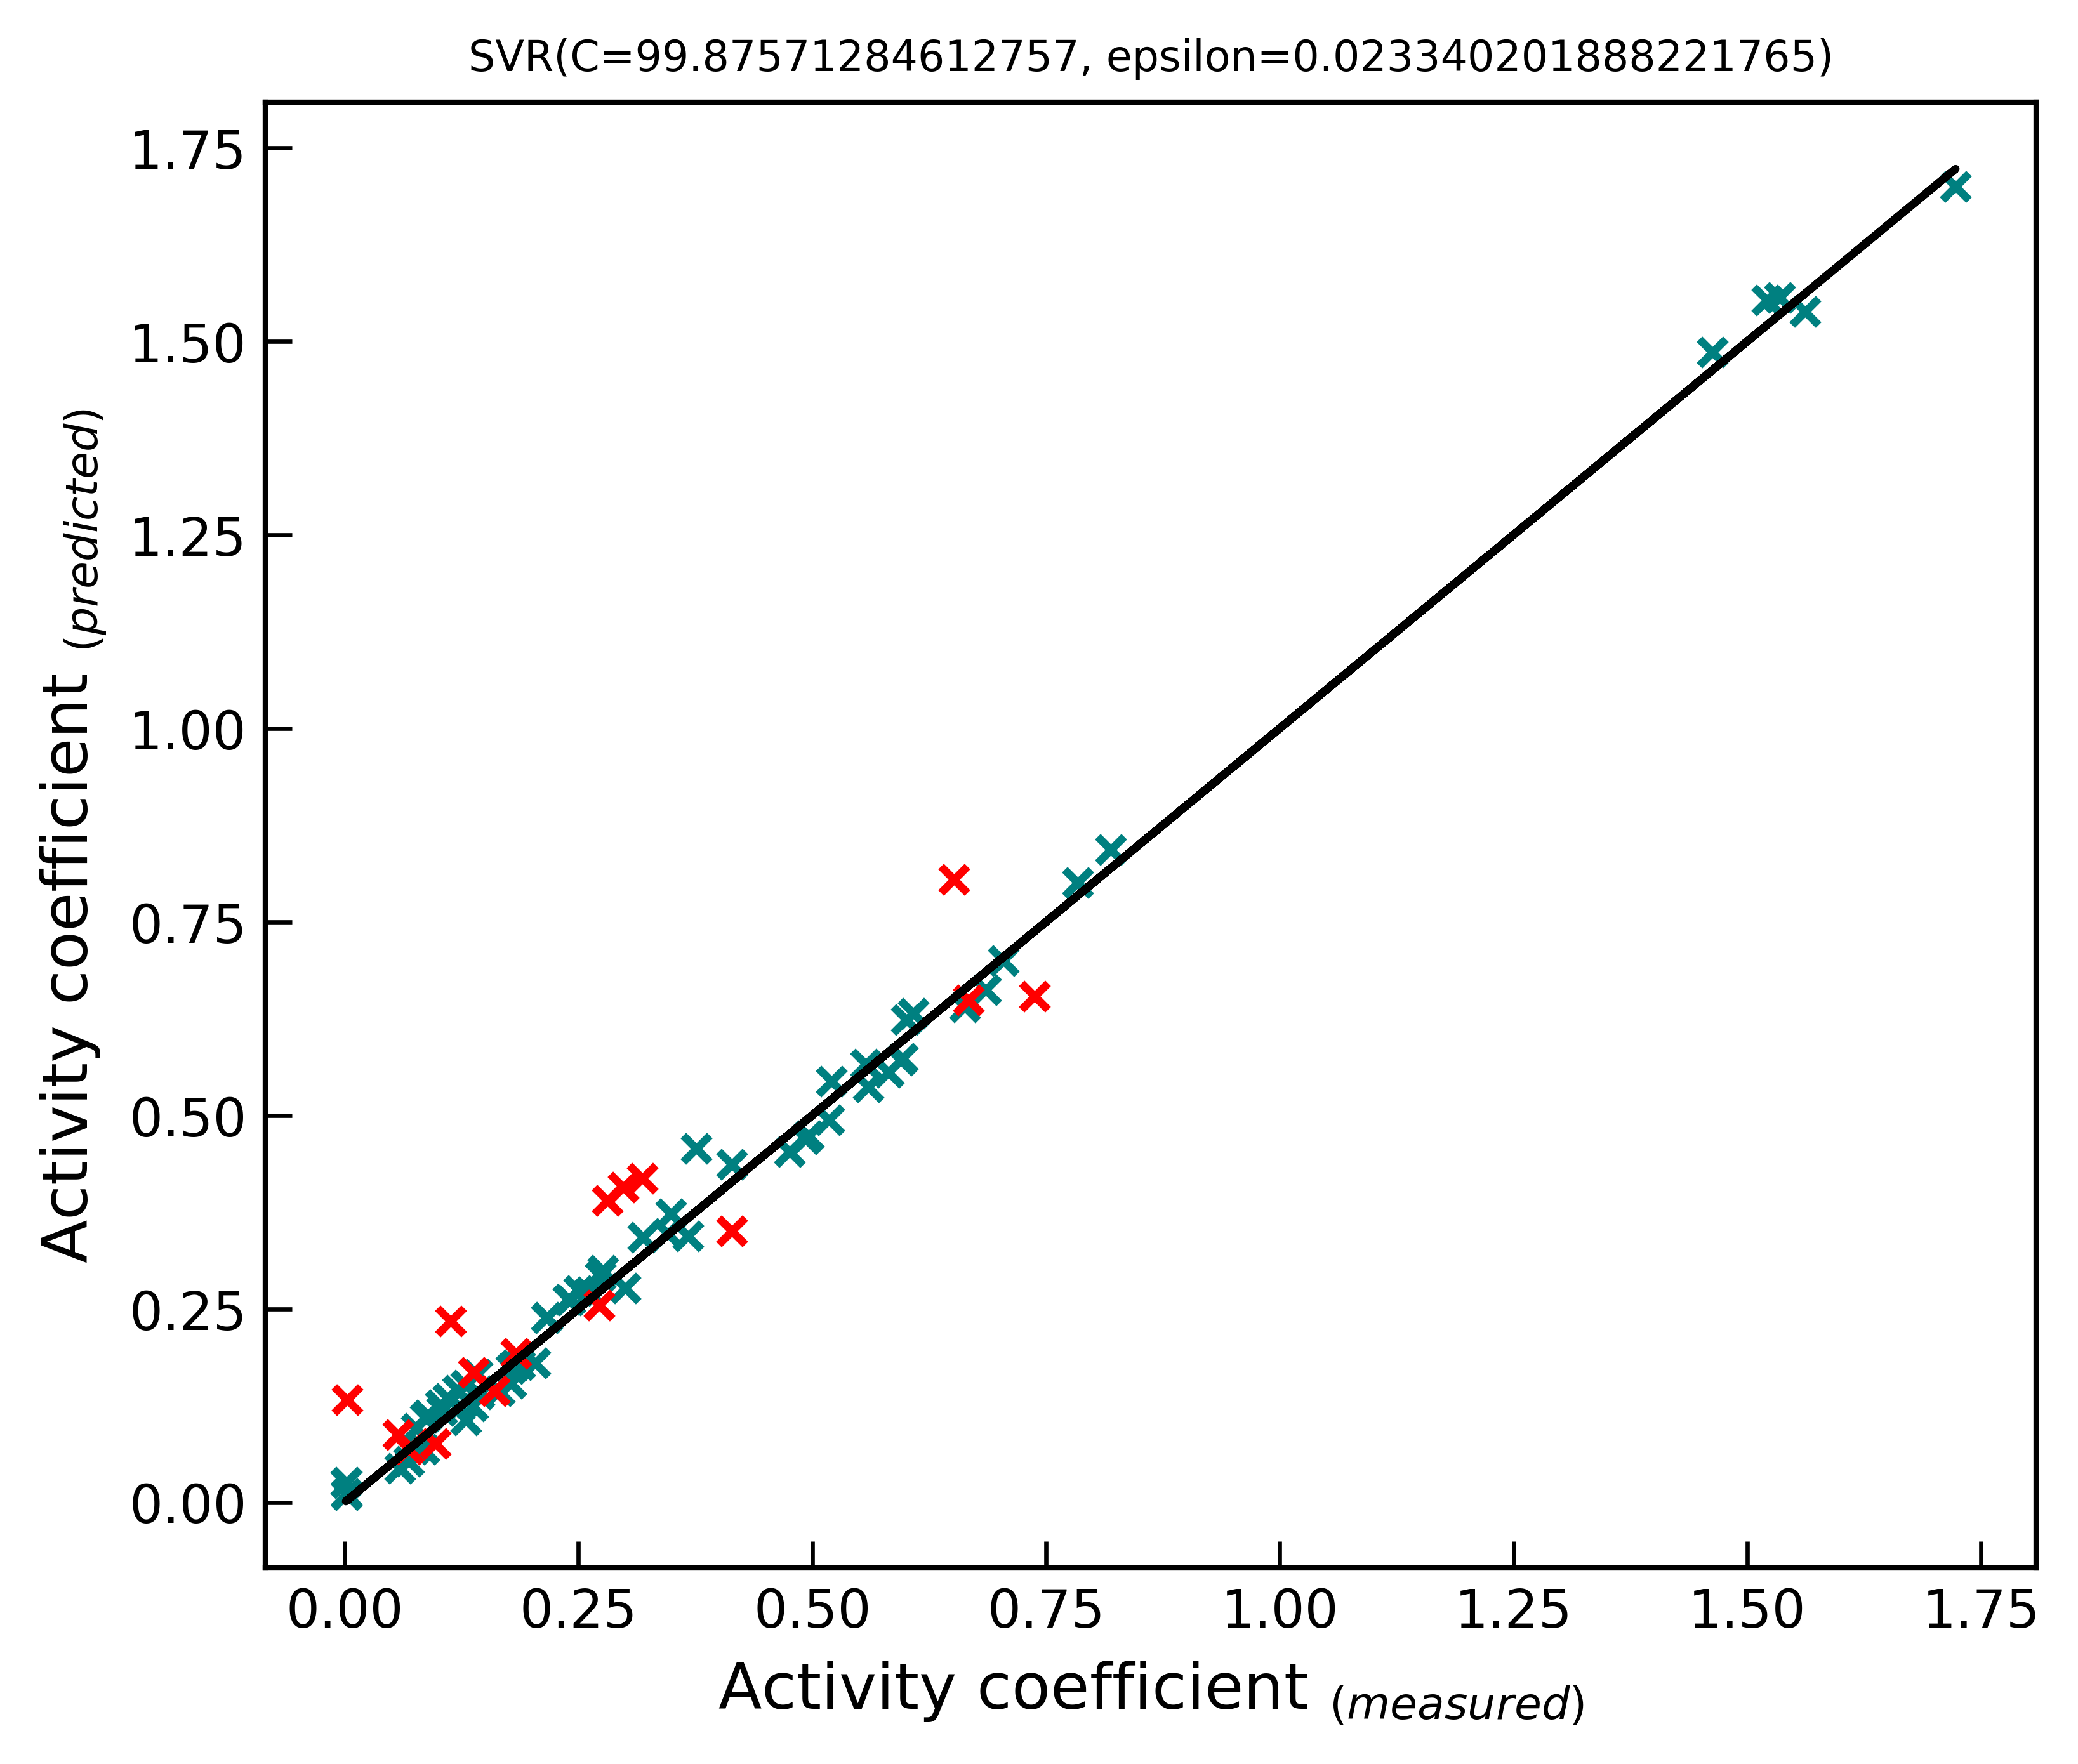

In [95]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
ax.tick_params(axis="y", which="major",right=False,direction="in",length=5)
ax.tick_params(axis="x", which="major",direction="in",length=5)
for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(1.)  # change width
plt.legend(loc="upper left",frameon=False)
plt.title(model_SVR,size=8)
ax.set_xlabel("Activity coefficient $_{(measured)}$",size=12, color = 'black')
ax.set_ylabel("Activity coefficient $_{(predicted)}$",size=12, color = 'black')
ax.plot(y_train,y_train,color='black',linewidth=1.5)
plt.scatter(y_train, y_predicted_train,facecolors='teal',edgecolors='teal',s=25, label="Train",marker = 'x')
plt.scatter(y_test, y_predicted_test,facecolors='red',edgecolors='gold',s=25, label="Test",marker = 'x')